# Linear Regression Model

## Importing packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
from joblib import dump, load

## Loading data

In [5]:
df = pd.read_csv("Salary_dataset.csv")
df.head(3)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


## Data Visualization

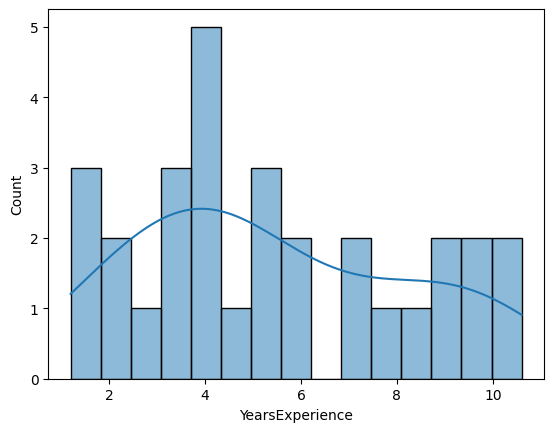

In [8]:
sns.histplot(df['YearsExperience'], kde= True, bins= 15 );

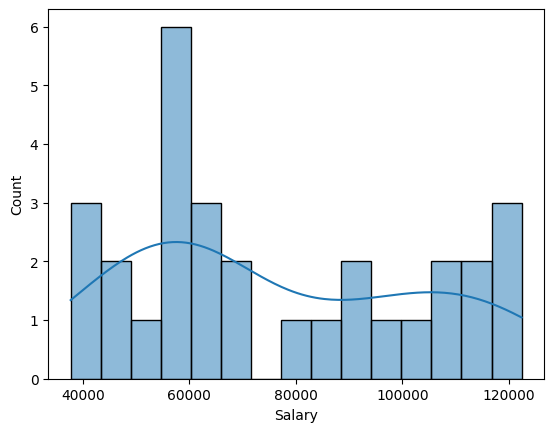

In [9]:
sns.histplot(df['Salary'], kde= True, bins= 15 );

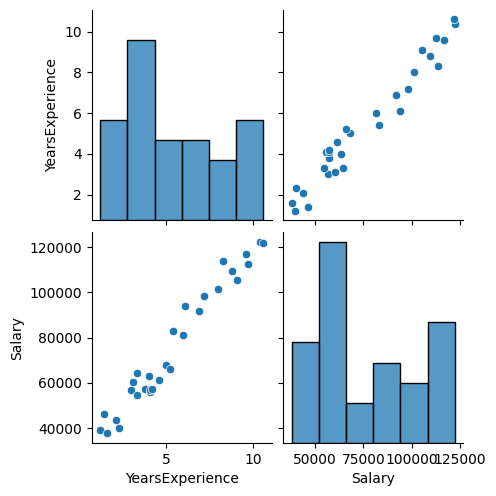

In [10]:
sns.pairplot(df.iloc[:,1:]);

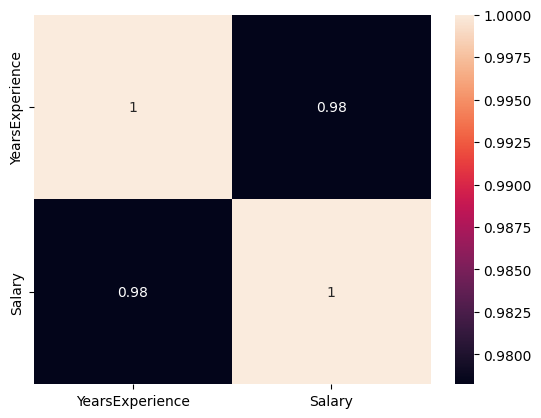

In [11]:
sns.heatmap(df.iloc[:,1:].corr(), annot= True);

## Linear Regression from Scratch

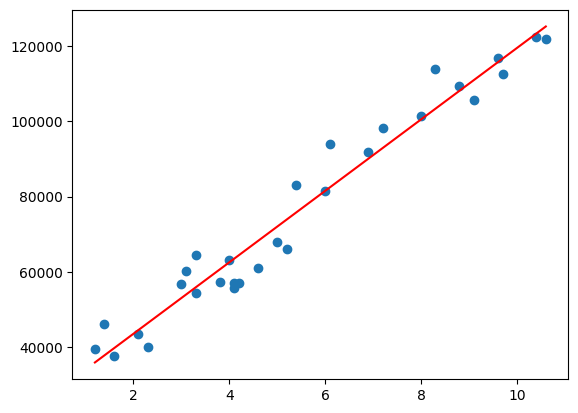

In [12]:
x = np.array(df['YearsExperience']).reshape(30,1)
y = np.array(df['Salary']).reshape(30,1)
w = np.zeros(1)
b = 0
m = len(x)


for i in range(2000):
    tot_cost = 0
    dw = 0
    db = 0
    for j in range(m):
        tot_cost +=  (np.dot(w,x[j]) + b - y[j]) ** 2
        tot_cost = (1/(2*m)) * tot_cost
    
    for k in range(m):
        dw += (1/m) * (np.dot(w,x[k]) + b - y[k]) * x[k]
        db += (1/m) * (np.dot(w,x[k]) + b - y[k])              
    
    w = w - 0.01 * dw
    b = b - 0.01 * db
    
plt.scatter(x,y)
plt.plot(x[:, 0], x.dot(w) + b, color='red');

In [13]:
w,b

(array([9505.0343591]), array([24472.96976383]))

## Linear Regression using scikit-learn

In [14]:
reg_model = LinearRegression()

In [15]:
df = df.drop("Unnamed: 0", axis= 1)
df.head(3)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


In [16]:
x = np.array(df.loc[:,'YearsExperience']).reshape(30,1)
y =  np.array(df.loc[:,'Salary'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [18]:
reg_model.score(X_train, y_train)

0.9574526669392872

In [19]:
preds = reg_model.predict(X_test)
preds

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [20]:
print('MAE =', metrics.mean_absolute_error(y_test, preds))
print('MSE =', metrics.mean_squared_error(y_test, preds))

MAE = 5161.3287104001765
MSE = 37784662.46621304


In [21]:
metrics.r2_score(y_test, preds)

0.9414466227178215

In [22]:
reg_model.coef_ ,reg_model.intercept_

(array([9339.08172382]), 24985.530162511684)

In [23]:
reg_model.coef_

array([9339.08172382])

In [24]:
reg_model.intercept_

24985.530162511684

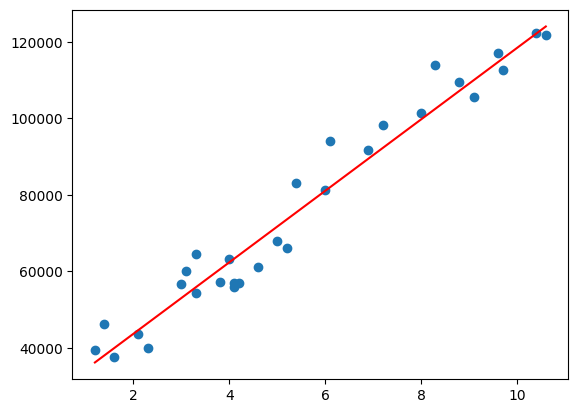

In [25]:
plt.scatter(x,y);
plt.plot(x[:,0],x.dot(reg_model.coef_[0]) + reg_model.intercept_,color='red');

## Saving Model

In [32]:
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(reg_model, f)

In [34]:
dump(reg_model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [36]:
model = load('linear_regression_model.joblib')
predictions = model.predict(X_test)
predictions

array([116512.83848464,  72098.0155738 , 103282.8912346 ,  75878.00050238,
        56033.07962732,  60758.06078805, 123127.81210966, 108007.87239533,
        63593.04948449])